# Data Visualization on EUR-USD Exchange Rates

## Dataset

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.style as style

exchangeRates = pd.read_csv('euro-daily-hist_1999_2020.csv')
exchangeRates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [2]:
exchangeRates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [3]:
exchangeRates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

## Data Cleaning

In [4]:
exchangeRates.rename(columns={'[US dollar ]': 'US_dollar', 'Period\\Unit:': 'Time'}, inplace = True)
exchangeRates['Time'] = pd.to_datetime(exchangeRates['Time'])
exchangeRates.sort_values('Time', inplace = True)
exchangeRates.reset_index(drop = True, inplace = True)
exchangeRates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [5]:
euro_to_dollar = exchangeRates[['Time', 'US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts() # 62 '-' characters

-         62
1.2276     9
1.1215     8
1.1305     7
1.1268     6
          ..
1.3681     1
1.0999     1
1.4222     1
1.3256     1
0.8767     1
Name: US_dollar, Length: 3528, dtype: int64

In [6]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


## Rolling Mean

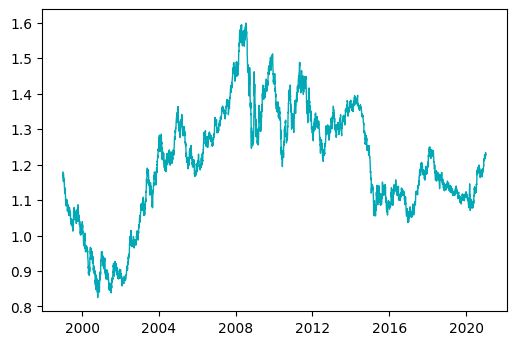

In [7]:
%matplotlib inline

plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'], color = '#00a9b5', linewidth = 1)
plt.show()

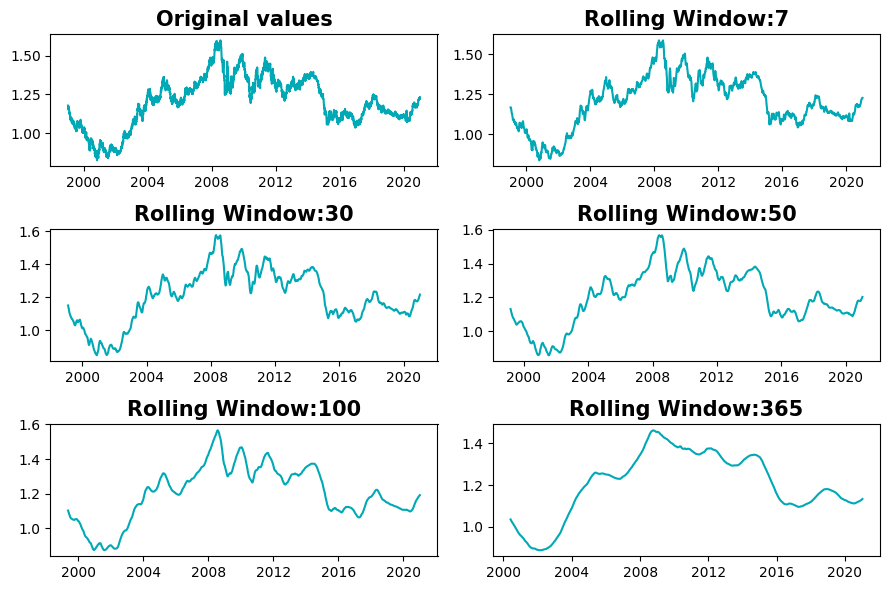

In [8]:
plt.figure(figsize = (9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'], color = '#00a9b5')
plt.title('Original values', weight = 'bold', size = 15)

for i, rolling_mean in zip([2, 3, 4, 5, 6], [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'].rolling(rolling_mean).mean(),
             color = '#00a9b5')
    
    plt.title('Rolling Window:' + str(rolling_mean), weight = 'bold', size = 15)
    
plt.tight_layout() # adjust the padding between subplots
plt.show()

In [9]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357


## Story Ideas

Below are the story ideas for the data:

- Displaying how the euro-dollar exchange rate changed due to the impact of 911 tragedy. The analysis can take a subset from 11 Sep, 2000 to Sep 11, 2002 - one year before and after 9/11.

-  Displaying how the euro-dollar exchange rate changed throughout the financial crisis of 2007–2008. For comparison, we may also display the statistics from 2016 and 2009.

-  Comparing the changes in the euro-dollar exchange rate under the three most recent US presidents — George W. Bush (2001–2009), Barack Obama (2009–2017), and Donald Trump (2017–2021).

## Storytelling - Data Visualization

### Impact of 911

In [10]:
# isolating pre-911 and post-911 periods inclusively
pre_start_date = '2000-09-11'
pre_end_date = '2001-09-10'

pre_start_date = pd.to_datetime(pre_start_date)
pre_end_date = pd.to_datetime(pre_end_date)
pre_911 = euro_to_dollar[euro_to_dollar['Time'].between(pre_start_date, pre_end_date)]

print(pre_911.head(5))
print(pre_911.tail(5))

          Time  US_dollar  rolling_mean
440 2000-09-11     0.8609      0.898530
441 2000-09-12     0.8614      0.896363
442 2000-09-13     0.8654      0.894737
443 2000-09-14     0.8693      0.893620
444 2000-09-15     0.8615      0.892233
          Time  US_dollar  rolling_mean
696 2001-09-04     0.8970      0.896613
697 2001-09-05     0.8891      0.896940
698 2001-09-06     0.8855      0.897243
699 2001-09-07     0.8952      0.897857
700 2001-09-10     0.9047      0.898843


In [11]:
post_start_date = '2001-09-11'
post_end_date = '2002-09-11'

post_start_date = pd.to_datetime(post_start_date)
post_end_date = pd.to_datetime(post_end_date)
post_911 = euro_to_dollar[euro_to_dollar['Time'].between(post_start_date, post_end_date)]

print(post_911.head(5))
print(post_911.tail(5))

          Time  US_dollar  rolling_mean
701 2001-09-11     0.8964      0.899540
702 2001-09-12     0.9052      0.900323
703 2001-09-13     0.9060      0.901230
704 2001-09-14     0.9219      0.902607
705 2001-09-17     0.9269      0.904153
          Time  US_dollar  rolling_mean
958 2002-09-05     0.9975      0.980690
959 2002-09-06     0.9918      0.980390
960 2002-09-09     0.9794      0.980300
961 2002-09-10     0.9760      0.980050
962 2002-09-11     0.9749      0.979937


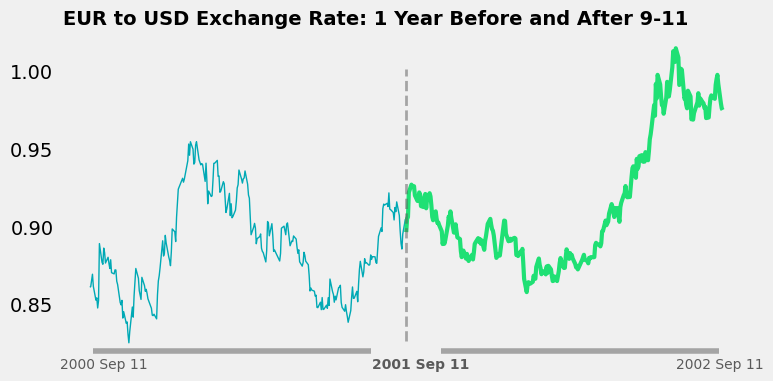

In [12]:
# FiveThirtyEight style
style.use('fivethirtyeight')

# creating the plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(pre_911['Time'], pre_911['US_dollar'], linewidth = 1, color = '#00a9b5')
ax.plot(post_911['Time'], post_911['US_dollar'], linewidth = 3, color ='#1fe074')
ax.set_xticklabels([])
ax.grid(visible = False)

# lines
ax.axvline(dt.datetime(2001, 9, 11), ymin = 0.05, ymax = 0.89, color = '#5A5A5A', alpha = 0.5,
           linewidth = 2, linestyle='dashed')
ax.axhline(0.82, xmin = 0.05, xmax = 0.45, color = '#5A5A5A', alpha = 0.5)
ax.axhline(0.82, xmin = 0.55, xmax = 0.95, color = '#5A5A5A', alpha = 0.5)

# text
ax.text(730340, 0.809, '2000 Sep 11', size = 10, color = '#5A5A5A')
ax.text(731050, 0.809, '2002 Sep 11', size = 10, color = '#5A5A5A')
ax.text(730700,0.809, '2001 Sep 11', size = 10, color = '#5A5A5A', weight = 'bold')

# title
ax.text(730343, 1.03, 'EUR to USD Exchange Rate: 1 Year Before and After 9-11', size = 14, weight = 'bold')

plt.show()

### Financial Crisis

In [13]:
financialCrisis = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2006)
                                       &(euro_to_dollar['Time'].dt.year <= 2009)]
financialCrisis_7_8 = euro_to_dollar.copy()[(euro_to_dollar.Time.dt.year >= 2007)
                                           &(euro_to_dollar.Time.dt.year <= 2008)]

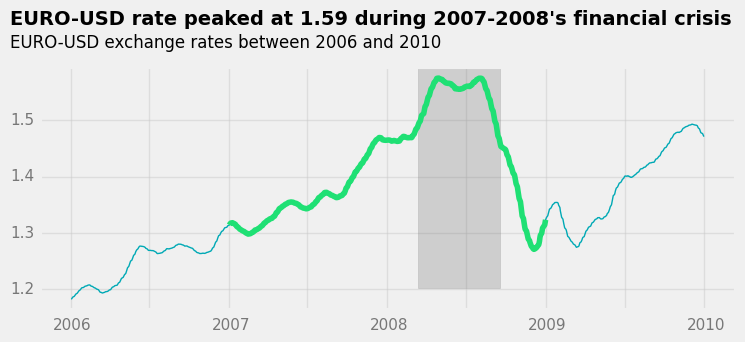

In [14]:
# FiveThirtyEight style
style.use('fivethirtyeight')

# creating the plot
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(financialCrisis['Time'],
        financialCrisis['rolling_mean'],
        linewidth=1, color='#00a9b5')

# highlighting the 2007-2008 period
ax.plot(financialCrisis_7_8['Time'],
        financialCrisis_7_8['rolling_mean'],
        linewidth=4, color='#1fe074')

# highlihting the peak of the crisis
ax.axvspan(xmin=733112.0, xmax=733302.0, ymin=0.09, alpha=0.3, color='grey')
    
# separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x = 732272.0
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x += 365

y = 1.193   
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(732172.0, y, rate, alpha=0.5, fontsize=11)
    y += 0.1

# title and a subtitle    
ax.text(732172.0, 1.67, "EURO-USD rate peaked at 1.59 during 2007-2008's financial crisis", 
        weight='bold')
ax.text(732172.0, 1.63, 'EURO-USD exchange rates between 2006 and 2010',
        size=12)

# grid transperancy
ax.grid(alpha=0.5)

plt.show()

### The Three US Presidencies

In [15]:
presidency = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2021)]

bush = presidency.copy()[presidency['Time'].dt.year < 2009]
obama = presidency.copy()[(presidency['Time'].dt.year >= 2009) & (presidency['Time'].dt.year < 2017)]
trump = presidency.copy()[(presidency['Time'].dt.year >= 2017) & (presidency['Time'].dt.year < 2021)]

The graphs below are constructed using matplotlib's functional technique. This strategy offers more freedom in how the subplots are organized:

-  Three of the graphs are first constructed on a 2-by-3 grid (this grid should have six subplots, but only three are built; the bottom row remains empty).
-  After that, a bottom graph is constructed on 2-by-1 grid (this grid should have two subplots; the top row remains empty).
-  Three graphs are displayed in the top row and one graph is displayed in the bottom row when the two grids are combined.

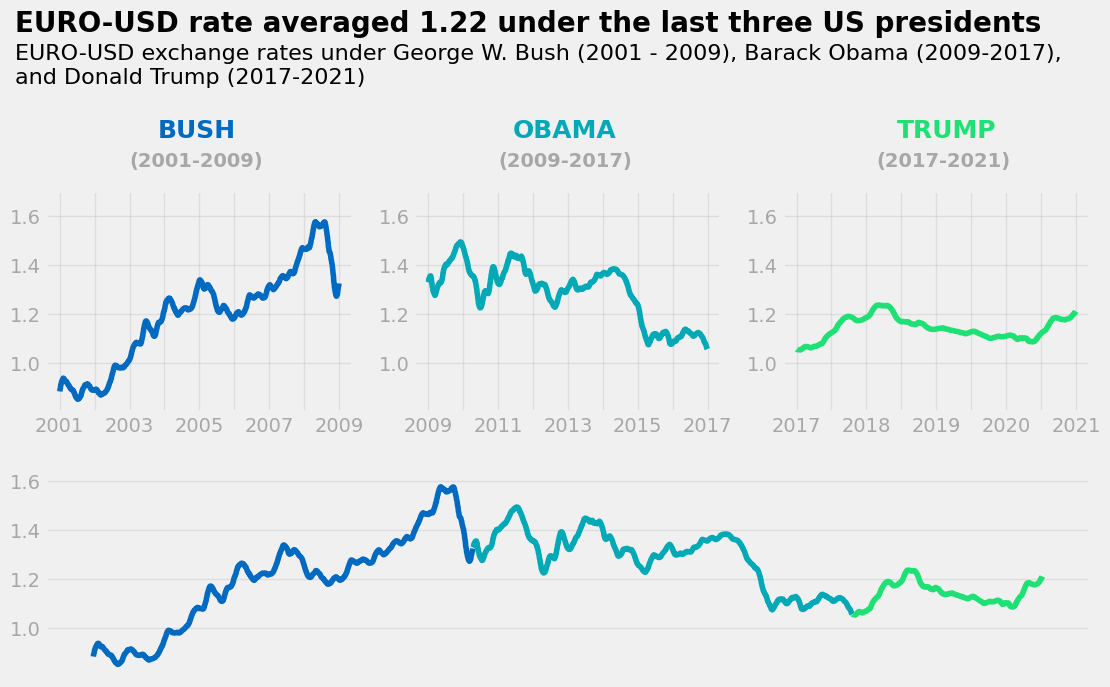

In [16]:
# FiveThirtyEight style
style.use('fivethirtyeight')

# creating the subplots
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

# changes to the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'], alpha=0.3)
    ax.grid(alpha=0.5)    
    
# ax1 - Bush
ax1.plot(bush['Time'], bush['rolling_mean'], color='#0069c0')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '', '2007', '', '2009'], alpha=0.3)
ax1.text(731516.0, 1.92, 'BUSH', fontsize=18, weight='bold', color='#0069c0')
ax1.text(731216.0, 1.8, '(2001-2009)', weight='bold', alpha=0.3)

# ax2 - Obama
ax2.plot(obama['Time'], obama['rolling_mean'], color='#00a9b5')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '', '2015', '', '2017'], alpha=0.3)
ax2.text(734288.0, 1.92, 'OBAMA', fontsize=18, weight='bold', color='#00a9b5')
ax2.text(734138.0, 1.8, '(2009-2017)', weight='bold', alpha=0.3)

# ax3 - Trump
ax3.plot(trump['Time'], trump['rolling_mean'], color='#1fe074')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '', '2020', '', '2021'], alpha=0.3)
ax3.text(736855.0, 1.92, 'TRUMP', fontsize=18, weight='bold', color='#1fe074')
ax3.text(736745.0, 1.8, '(2017-2021)', weight='bold', alpha=0.3)

# ax4 - presidencies
ax4.plot(bush['Time'], bush['rolling_mean'], color='#0069c0')
ax4.plot(obama['Time'], obama['rolling_mean'], color='#00a9b5')
ax4.plot(trump['Time'], trump['rolling_mean'], color='#1fe074')
ax4.grid(alpha=0.5)
ax4.set_xticks([])

# title and subtitle
ax1.text(730016.0, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents', fontsize=20, weight='bold')
ax1.text(730016.0, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''', fontsize=16)

plt.show()